In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

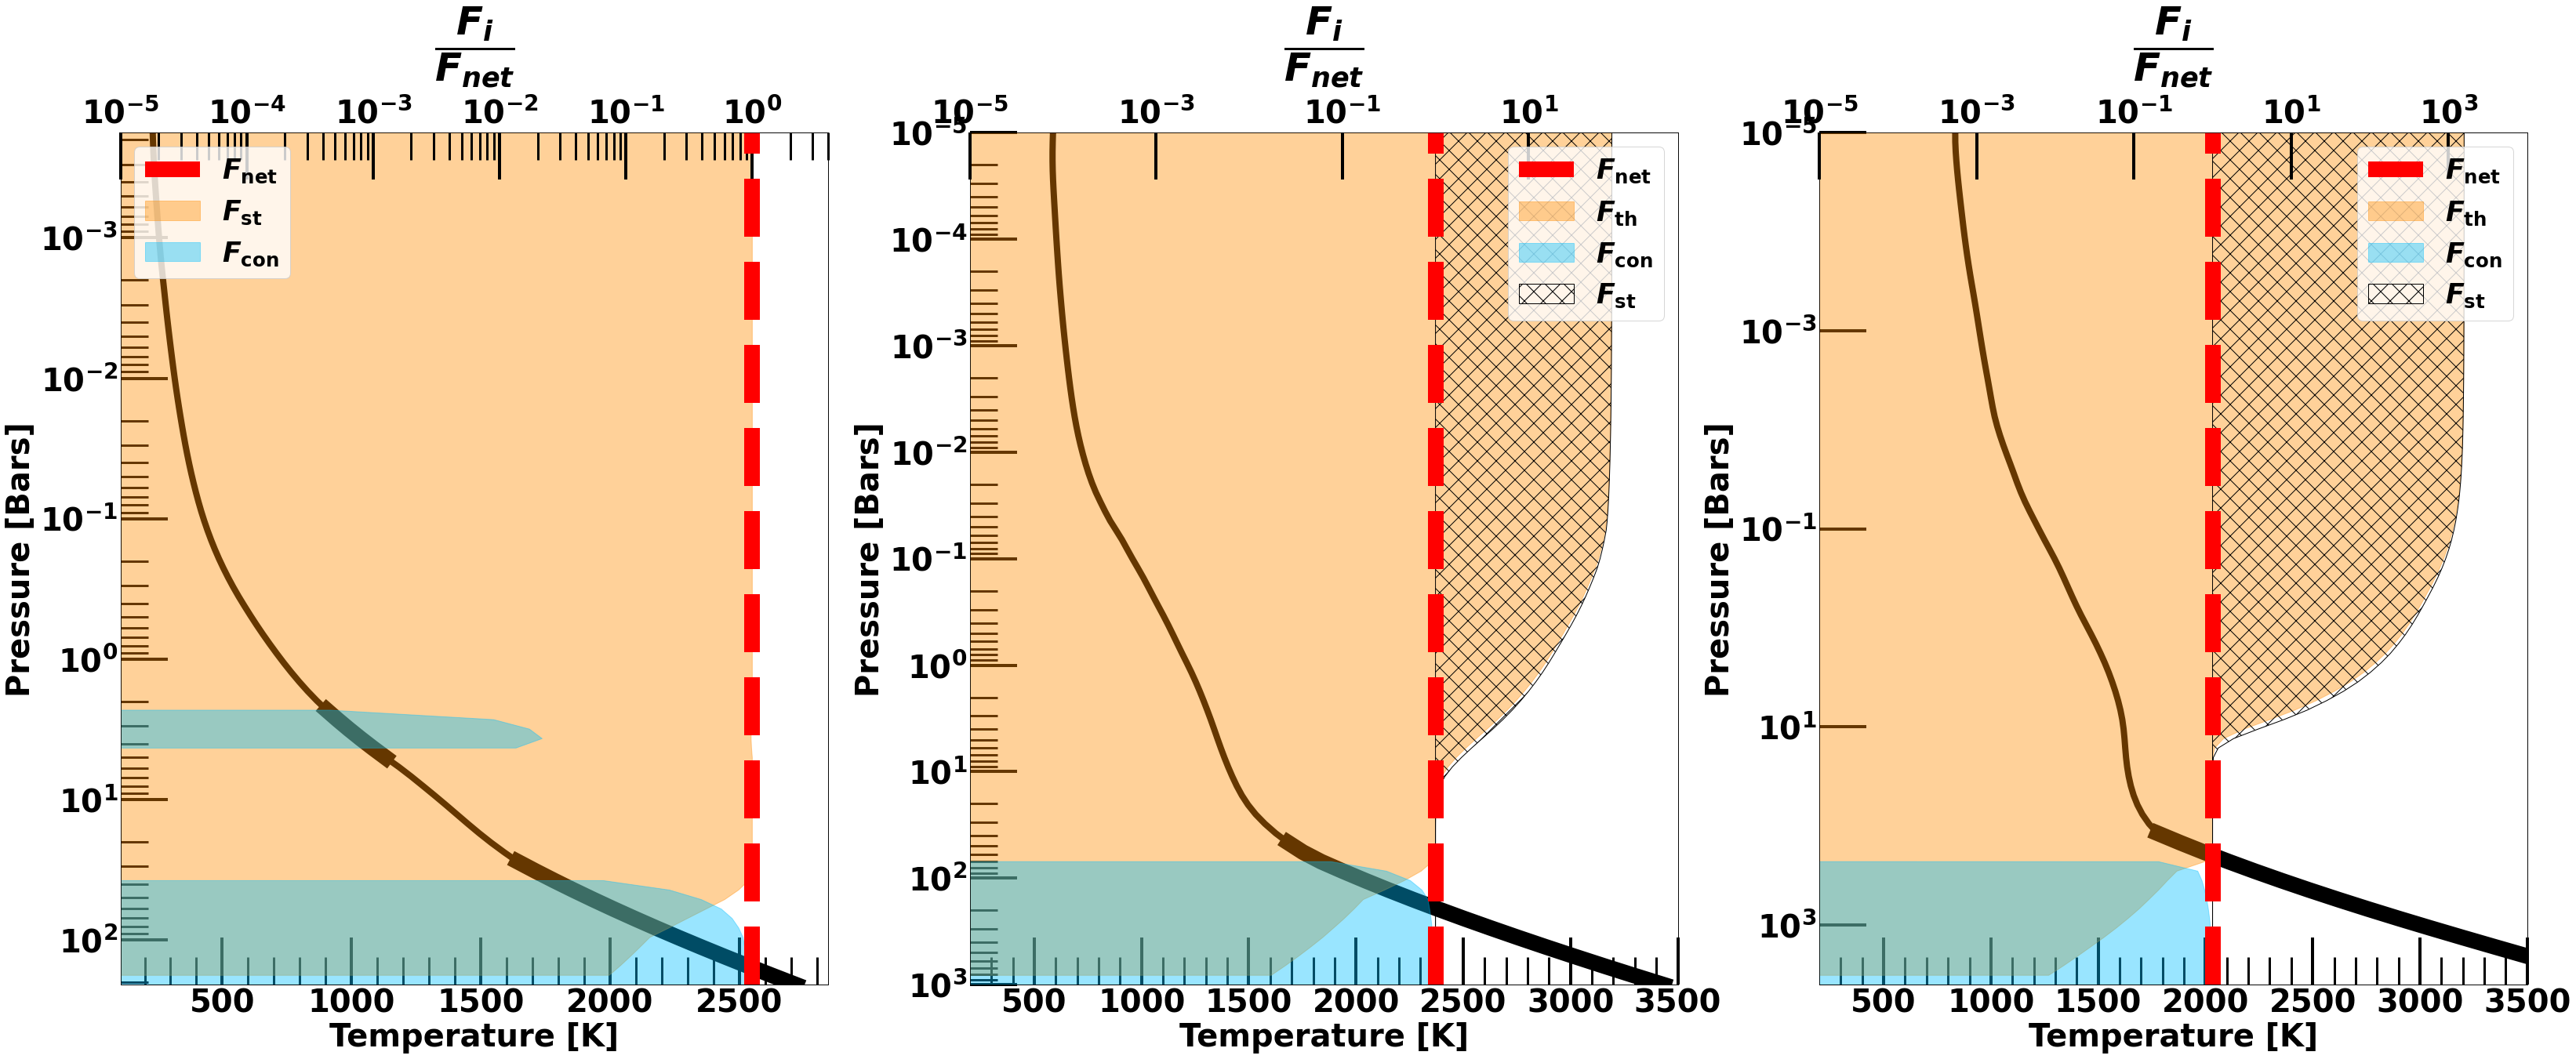

In [12]:
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

fig,ax = plt.subplots(nrows=1,ncols=3,figsize=(55,20))

Teff = 700
grav = 316
df1 = pd.read_csv("../../research/deq_miles/gridruns_new/profiles_new/profilegrid_eq_qt_eq_grid_"+str(Teff)+"_grav_"+str(grav)+"_mh_+0.0_sm_NA.dat", sep='\t')
path = "../../research/EGP_paper/array/"
th_layer = np.load(path+"BD_700_316_ir_layer.npy")
v_layer = np.load(path+"BD_700_316_v_layer.npy")

tidal = 0.56687e-4*(Teff**4)

nstr = [ 0 ,61, 67, 67, 77, 89]

ax[0].set_ylim(np.max(df1['pressure']),np.min(df1['pressure']))

ax1 = ax[0].twiny()
ax1.set_xlim(1e-5,4)
ax1.loglog(1e-7,1e-12)

th_flx,cv_flx =np.zeros_like(th_layer),np.zeros_like(th_layer)
for i in range(len(th_layer)):
        th_flx[i]=min(1.0,(th_layer[i])/tidal)
        cv_flx[i] = min(1.0,(tidal-th_layer[i])/tidal)
ax1.fill_betweenx(df1['pressure'],1e-7,th_flx,color="darkorange",alpha=0.4,label=r"$F_{\rm st}$")
ax1.fill_betweenx(df1['pressure'],1e-7,cv_flx,color="deepskyblue",alpha=0.4,label=r"$F_{\rm con}$")
ax1.set_xlabel("$\dfrac{F_{i}}{F_{net}}$",fontsize = 50,labelpad=50)
ax1.axvline(1,linewidth=20,linestyle="--",color="r",label=r"$F_{\rm net}$")
#ax1.loglog((tidal-th_layer)/tidal,df1['pressure'])

ax[0].semilogy(df1['temperature'],df1['pressure'],color= "k",linewidth=8)
ax[0].semilogy(df1['temperature'][nstr[1]:nstr[2]],df1['pressure'][nstr[1]:nstr[2]],color= "k",linewidth=20)
ax[0].semilogy(df1['temperature'][nstr[4]:],df1['pressure'][nstr[4]:],color= "k",linewidth=20)


ax[0].minorticks_on()
ax1.minorticks_on()
ax1.tick_params(axis='x',which='major',color="k",length =60, width=4,direction='in',labelsize=40)
ax1.tick_params(axis='x',which='minor',color="k",length =35, width=3,direction='in',labelsize=50)

ax[0].tick_params(axis='both',which='major',color="k",length =60, width=4,direction='in',labelsize=40)
ax[0].tick_params(axis='both',which='minor',color="k",length =35, width=3,direction='in',labelsize=50)
ax[0].set_xlabel("Temperature [K]",fontsize=40)
ax[0].set_ylabel("Pressure [Bars]",fontsize=40)


path = "../../research/EGP_paper/array/"
df1 = pd.read_csv(path+"300_25_0.1au_sun_planet_df", sep='\t')

th_layer_exo = np.load(path+"exo_300_25_0pt1_ir_layer.npy")
v_layer_exo = np.load(path+"exo_300_25_0pt1_v_level.npy")

Teff=300
ax[1].set_ylim(np.max(df1['pressure']),np.min(df1['pressure']))
ax[1].set_xlim(200,3500)

tidal = 0.56687e-4*(Teff**4)

ax2 = ax[1].twiny()
ax2.set_xlim(1e-5,400)
ax2.loglog(1e-7,1e-12)

th_flx,cv_flx,vis_flx =np.zeros_like(th_layer),np.zeros_like(th_layer),np.zeros_like(th_layer)

for i in range(len(th_layer_exo)):
        th_flx[i]= (th_layer_exo[i])/tidal #min(1.0,(th_layer_exo[i])/tidal)
        cv_flx[i] = (tidal-th_layer_exo[i])/tidal 
        vis_flx[i] = 1+abs(0.5*v_layer_exo[0][0][i]/tidal) #min(1.0,(tidal-th_layer_exo[i])/tidal)
ax2.fill_betweenx(df1['pressure'],1e-7,th_flx,color="darkorange",alpha=0.4,label=r"$F_{\rm th}$")
ax2.fill_betweenx(df1['pressure'],1e-7,cv_flx,color="deepskyblue",alpha=0.4,label=r"$F_{\rm con}$")
ax2.fill_betweenx(df1['pressure'],1,vis_flx,facecolor="None",hatch="X",alpha=1,label=r"$F_{\rm st}$")
ax2.set_xlabel("$\dfrac{F_{i}}{F_{net}}$",fontsize = 50,labelpad=50)
ax2.axvline(1,linewidth=20,linestyle="--",color="r",label=r"$F_{\rm net}$")
#ax1.loglog((tidal-th_layer)/tidal,df1['pressure'])

ax[1].semilogy(df1['temperature'],df1['pressure'],color= "k",linewidth=8)
#ax[1].semilogy(df1['temperature'][nstr[1]:nstr[2]],df1['pressure'][nstr[1]:nstr[2]],color= "k",linewidth=12)
ax[1].semilogy(df1['temperature'][nstr[4]-2:],df1['pressure'][nstr[4]-2:],color= "k",linewidth=20)


ax[1].minorticks_on()
ax2.minorticks_on()
ax2.tick_params(axis='x',which='major',color="k",length =60, width=4,direction='in',labelsize=40)
ax2.tick_params(axis='x',which='minor',color="k",length =35, width=3,direction='in',labelsize=50)

ax[1].tick_params(axis='both',which='major',color="k",length =60, width=4,direction='in',labelsize=40)
ax[1].tick_params(axis='both',which='minor',color="k",length =35, width=3,direction='in',labelsize=50)
ax[1].set_xlabel("Temperature [K]",fontsize=40)
ax[1].set_ylabel("Pressure [Bars]",fontsize=40)


path = "../../research/EGP_paper/array/"
df1 = pd.read_csv(path+"200_25_0.05au_sun_planet_df", sep='\t')

th_layer_exo = np.load(path+"exo_200_25_0pt05_ir_layer.npy")
v_layer_exo = np.load(path+"exo_200_25_0pt05_v_level.npy")

Teff=200
ax[2].set_ylim(np.max(df1['pressure']),np.min(df1['pressure']))
ax[2].set_xlim(200,3500)
tidal = 0.56687e-4*(Teff**4)

ax3 = ax[2].twiny()
ax3.set_xlim(1e-5,1e4)
ax3.loglog(1e-7,1e-12)

th_flx,cv_flx,vis_flx =np.zeros_like(th_layer),np.zeros_like(th_layer),np.zeros_like(th_layer)

for i in range(len(th_layer_exo)):
        th_flx[i]= (th_layer_exo[i])/tidal #min(1.0,(th_layer_exo[i])/tidal)
        cv_flx[i] = (tidal-th_layer_exo[i])/tidal 
        vis_flx[i] = 1+abs(0.5*v_layer_exo[0][0][i]/tidal) #min(1.0,(tidal-th_layer_exo[i])/tidal)

th_flx[74],th_flx[75],th_flx[76]=1,1,1
ax3.fill_betweenx(df1['pressure'],1e-7,th_flx,color="darkorange",alpha=0.4,label=r"$F_{\rm th}$")
ax3.fill_betweenx(df1['pressure'],1e-7,cv_flx,color="deepskyblue",alpha=0.4,label=r"$F_{\rm con}$")
ax3.fill_betweenx(df1['pressure'],1,vis_flx,facecolor="None",hatch="X",alpha=1,label=r"$F_{\rm st}$")
ax3.set_xlabel("$\dfrac{F_{i}}{F_{net}}$",fontsize = 50,labelpad=50)
ax3.axvline(1,linewidth=20,linestyle="--",color="r",label=r"$F_{\rm net}$")
#ax1.loglog((tidal-th_layer)/tidal,df1['pressure'])

ax[2].semilogy(df1['temperature'],df1['pressure'],color= "k",linewidth=8)
#ax[1].semilogy(df1['temperature'][nstr[1]:nstr[2]],df1['pressure'][nstr[1]:nstr[2]],color= "k",linewidth=12)
ax[2].semilogy(df1['temperature'][74:],df1['pressure'][74:],color= "k",linewidth=20)


ax[2].minorticks_on()
ax3.minorticks_on()
ax3.tick_params(axis='x',which='major',color="k",length =60, width=4,direction='in',labelsize=40)
ax3.tick_params(axis='x',which='minor',color="k",length =35, width=3,direction='in',labelsize=50)

ax[2].tick_params(axis='both',which='major',color="k",length =60, width=4,direction='in',labelsize=40)
ax[2].tick_params(axis='both',which='minor',color="k",length =35, width=3,direction='in',labelsize=50)
ax[2].set_xlabel("Temperature [K]",fontsize=40)
ax[2].set_ylabel("Pressure [Bars]",fontsize=40)

ax1.legend(fontsize=35)
ax2.legend(fontsize=35)
ax3.legend(fontsize=35)

plt.savefig("benchmarking/bd_exo1_exo2.pdf",bbox_inches='tight')


In [11]:
print(th_flx[77])

0.7941749696017981
